In [1]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from scipy.stats import norm
%matplotlib inline

/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv
/kaggle/input/istanbul-last-1-year-earthquake-data/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv')
df

,Time,Unnamed: 1,Unnamed: 2,Magnitude,Unnamed: 4,EventLocationName
0,2019-04-02T16:07:43.6Z,NaN,NaN,3.2,NaN,WESTERN TURKEY
1,2019-04-12T13:03:47.8Z,NaN,NaN,4.0,NaN,WESTERN TURKEY
2,2019-04-28T14:49:25.1Z,NaN,NaN,3.4,NaN,NEAR THE COAST OF WESTERN TURKEY
3,2019-04-29T18:02:43.3Z,NaN,NaN,4.4,NaN,NEAR THE COAST OF WESTERN TURKEY
4,2019-04-29T18:39:50.8Z,NaN,NaN,3.8,NaN,NEAR THE COAST OF WESTERN TURKEY
...,...,...,...,...,...,...
344,2020-02-04T03:14:45.4Z,NaN,NaN,3.3,NaN,WESTERN TURKEY
345,2020-02-04T03:42:21.5Z,NaN,NaN,3.3,NaN,AEGEAN SEA
346,2020-02-04T06:13:29.2Z,NaN,NaN,3.3,NaN,AEGEAN SEA
347,2020-02-04T08:43:16.0Z,NaN,NaN,4.1,NaN,WESTERN TURKEY


In [3]:
df.describe()

,Unnamed: 1,Unnamed: 2,Magnitude,Unnamed: 4
count,0.0,0.0,349.000000,0.0
mean,NaN,NaN,3.406017,NaN
std,NaN,NaN,0.444369,NaN
min,NaN,NaN,3.000000,NaN
25%,NaN,NaN,3.100000,NaN
50%,NaN,NaN,3.300000,NaN
75%,NaN,NaN,3.600000,NaN
max,NaN,NaN,5.700000,NaN


In [4]:
df.columns

Index([' Time ', 'Unnamed: 1', 'Unnamed: 2', ' Magnitude ', 'Unnamed: 4',
       ' EventLocationName'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0    Time               349 non-null    object 
 1   Unnamed: 1          0 non-null      float64
 2   Unnamed: 2          0 non-null      float64
 3    Magnitude          349 non-null    float64
 4   Unnamed: 4          0 non-null      float64
 5    EventLocationName  349 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.5+ KB


In [6]:
df['Times'] = pd.to_datetime(df[' Time '], format='%Y%m%d', errors='ignore')

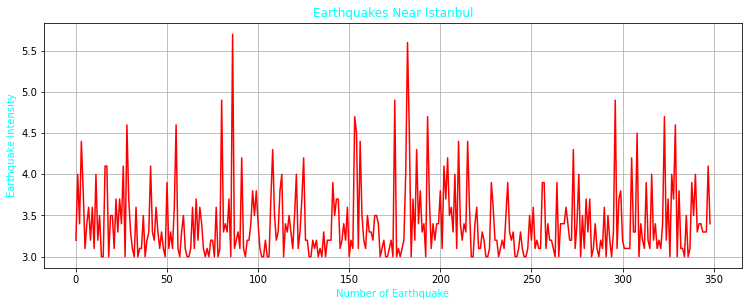

In [7]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df.index, df[' Magnitude '], color='red')
plt.xlabel('Number of Earthquake',color='cyan')
plt.ylabel('Earthquake Intensity',color='cyan')
plt.grid(True)
plt.title("Earthquakes Near Istanbul", color='cyan')
plt.show()

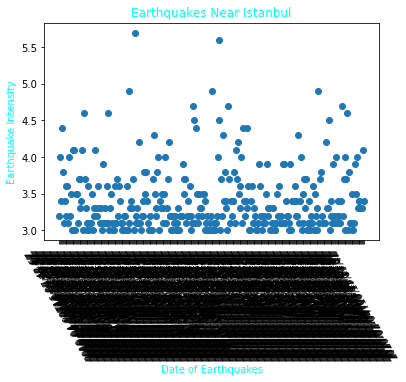

In [8]:

plt.scatter(x=df[' Time '], y=df[' Magnitude '])
plt.xticks(rotation=120)
plt.xlabel('Date of Earthquakes',color='cyan')
plt.ylabel('Earthquake Intensity',color='cyan')

plt.title("Earthquakes Near Istanbul", color='cyan')
plt.show()


In [9]:
#Last 1 year eartquakes' average
df[' Magnitude '].mean()

3.406017191977079

In [10]:
#Monte Carlo Simulation for future Earthquakes
ticker = '/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv'
data = pd.DataFrame()
data[ticker] = pd.read_csv('/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv')[' Magnitude ']
log_returns= np.log(1 + data.pct_change())
log_returns.tail()



,/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv
344,-0.029853
345,0.000000
346,0.000000
347,0.217065
348,-0.187212


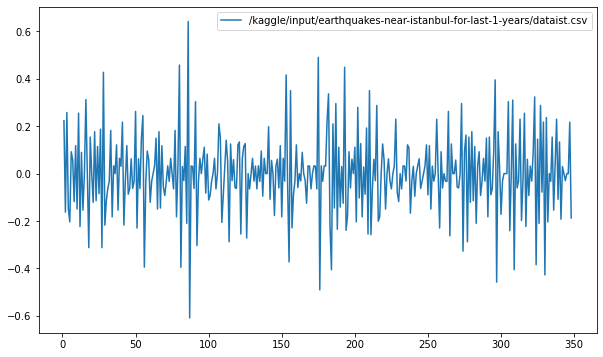

In [11]:
log_returns.plot(figsize=(10,6))
plt.show()

In [12]:
u = log_returns.mean()
u

/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv    0.000174
dtype: float64

In [13]:
var = log_returns.var()
var

/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv    0.028462
dtype: float64

In [14]:


drift = u- (0.5 * var)
drift



/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv   -0.014057
dtype: float64

In [15]:
stdev = log_returns.std()
stdev

/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv    0.168707
dtype: float64

In [16]:
type(drift)

pandas.core.series.Series

In [17]:
type(stdev)

pandas.core.series.Series

In [18]:
np.array(drift)

array([-0.01405678])

In [19]:
drift.values


array([-0.01405678])

In [20]:
stdev.values

array([0.16870678])

In [21]:


norm.ppf(0.95)



1.6448536269514722

In [22]:
x = np.random.rand(10,2)
x

array([[0.01076701, 0.52786246],
       [0.89260517, 0.1891799 ],
       [0.96014021, 0.10873275],
       [0.74296226, 0.30212441],
       [0.9455612 , 0.64012454],
       [0.83686521, 0.64372574],
       [0.42610507, 0.06580273],
       [0.10879866, 0.44786514],
       [0.90223276, 0.13777678],
       [0.55183313, 0.14113614]])

In [23]:


norm.ppf(x)



array([[-2.29848834,  0.06989771],
       [ 1.24050229, -0.88092245],
       [ 1.75231549, -1.23329561],
       [ 0.65250497, -0.51830022],
       [ 1.60325852,  0.35879171],
       [ 0.98165553,  0.3684355 ],
       [-0.1862992 , -1.507801  ],
       [-1.23294224, -0.13105693],
       [ 1.29437917, -1.09036236],
       [ 0.1302941 , -1.07522886]])

In [24]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.16465998, -0.79011265],
       [ 0.45630404, -1.02636831],
       [ 0.78418746, -0.54777495],
       [-1.36306194,  1.01404552],
       [-0.34658208,  0.62346297],
       [ 1.1010313 ,  0.42370234],
       [-0.06885188,  1.55149415],
       [ 0.7164787 , -0.34662274],
       [-1.45680165, -0.46556477],
       [-0.42406907,  0.5494717 ]])

In [25]:
t_intervals = 365
iterations = 5

In [26]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))

In [27]:
daily_returns

array([[0.96857853, 1.34385277, 1.10454953, 0.84048396, 0.9294323 ],
       [0.95398158, 0.89825772, 1.10777401, 1.0691611 , 1.06110534],
       [1.0437122 , 0.90503941, 0.93219273, 1.00069911, 1.25895108],
       ...,
       [1.10349163, 0.99310103, 1.01997945, 1.05342647, 1.02535347],
       [1.26014532, 1.04926091, 0.66019498, 0.71906403, 0.9530293 ],
       [0.94380275, 1.30063131, 0.9069564 , 0.90898669, 1.13070161]])

In [28]:
S0 = data.iloc[-1]
S0

/kaggle/input/earthquakes-near-istanbul-for-last-1-years/dataist.csv    3.4
Name: 348, dtype: float64

In [29]:


price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [30]:
price_list[0] = S0
price_list

array([[3.4, 3.4, 3.4, 3.4, 3.4],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

In [31]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]
price_list

array([[3.40000000e+00, 3.40000000e+00, 3.40000000e+00, 3.40000000e+00,
        3.40000000e+00],
       [3.24353737e+00, 3.05407625e+00, 3.76643163e+00, 3.63514773e+00,
        3.60775816e+00],
       [3.38531952e+00, 2.76405935e+00, 3.51104020e+00, 3.63768909e+00,
        4.54199104e+00],
       ...,
       [3.36754883e-04, 1.57195800e-02, 9.33778555e-04, 6.26909365e-05,
        7.86557379e-02],
       [4.24360091e-04, 1.64939408e-02, 6.16475912e-04, 4.50787976e-05,
        7.49612230e-02],
       [4.00512221e-04, 2.14525359e-02, 5.59116772e-04, 4.09760271e-05,
        8.47587755e-02]])

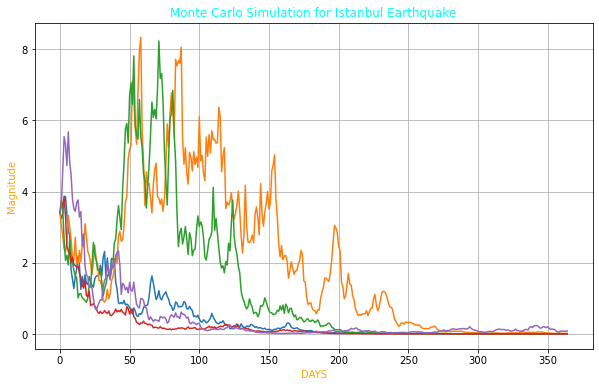

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list) 
plt.grid(True)
plt.xlabel('DAYS', color='orange')
plt.ylabel('Magnitude', color='orange')
plt.title('Monte Carlo Simulation for Istanbul Earthquake',color='cyan')
plt.show()

# # **Last data is from 4th Feb. Today is 26th June. 143 Days. And around 143.day 5.5 magnitude earthquake hit in Mersin.**